<a href="https://colab.research.google.com/github/SowmyaYamasani/Atharvo-Project/blob/main/AtharvoProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

df = pd.read_csv('/content/insurance_claims (3).csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,2014-10-17,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,1991-07-16,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,2014-01-05,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,2003-02-17,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [4]:
df = df.drop('policy_number',  axis = 1)
df = df.drop('_c39', axis = 1)

In [5]:
import numpy as np
#Deriving a feature months between 'policy bind date' and 'incident date'
df['incident_date'] = pd.to_datetime(df.incident_date)
df['policy_bind_date'] = pd.to_datetime(df.policy_bind_date)
df['months_bw_incident_and_bind'] = ((df.incident_date - df.policy_bind_date)/np.timedelta64(1, 'M'))
df['months_bw_incident_and_bind'] = df['months_bw_incident_and_bind'].astype(int)
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind
0,328,48,2014-10-17,OH,250/500,1000,1406.91,0,466132,MALE,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,3
1,228,42,2006-06-27,IN,250/500,2000,1197.22,5000000,468176,MALE,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,100
2,134,29,2000-09-06,OH,100/300,2000,1413.14,5000000,430632,FEMALE,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,170
3,256,41,1990-05-25,IL,250/500,2000,1415.74,6000000,608117,FEMALE,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,290
4,228,44,2014-06-06,IL,500/1000,1000,1583.91,6000000,610706,MALE,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,OH,500/1000,1000,1310.80,0,431289,FEMALE,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,278
996,285,41,2014-01-05,IL,100/300,1000,1436.79,0,608177,FEMALE,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,12
997,130,34,2003-02-17,OH,250/500,500,1383.49,3000000,442797,FEMALE,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,140
998,458,62,2011-11-18,IL,500/1000,2000,1356.92,5000000,441714,MALE,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,38


In [6]:
#Deriving a feature indicating whether months between policy bind date and incident date falls within months as customer
df['incident_within_customership'] = df[['months_bw_incident_and_bind','months_as_customer']].apply(lambda x: 1 if x.months_as_customer >= x.months_bw_incident_and_bind and x.months_bw_incident_and_bind > 0 else 0, axis=1)
df['capital-loss'] = df['capital-loss'].abs()

In [7]:
#Data Quality Check
#Check for consistency in data: Total claim must be equal to sum of "injury_claim", "property_claim", "vehicle_claim" and print the number of rows where it does not hold true
print (df[df['total_claim_amount'] != df['injury_claim'] + df['property_claim']+ df['vehicle_claim']].shape[0])
#Check for accepted range/set of values and print the number of rows where value < 0 in each numerical column
for i in dict(df.dtypes):
 if (dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==   'float64'):
  print(i , " : ", df[df[i]<0].shape[0])

0
months_as_customer  :  0
age  :  0
policy_deductable  :  0
policy_annual_premium  :  0
umbrella_limit  :  1
insured_zip  :  0
capital-gains  :  0
capital-loss  :  0
incident_hour_of_the_day  :  0
number_of_vehicles_involved  :  0
bodily_injuries  :  0
witnesses  :  0
total_claim_amount  :  0
injury_claim  :  0
property_claim  :  0
vehicle_claim  :  0
auto_year  :  0
months_bw_incident_and_bind  :  0
incident_within_customership  :  0


In [8]:
#Treating unaccepted value by row removal
df.drop(df.index[df[df['umbrella_limit']<0].index[0]], inplace = True)
print(df[df['umbrella_limit']<0].shape[0])

0


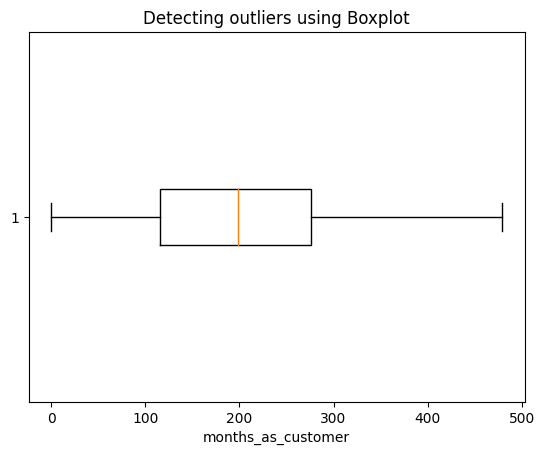

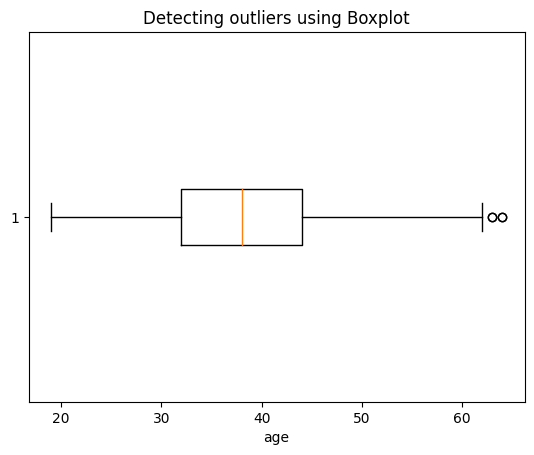

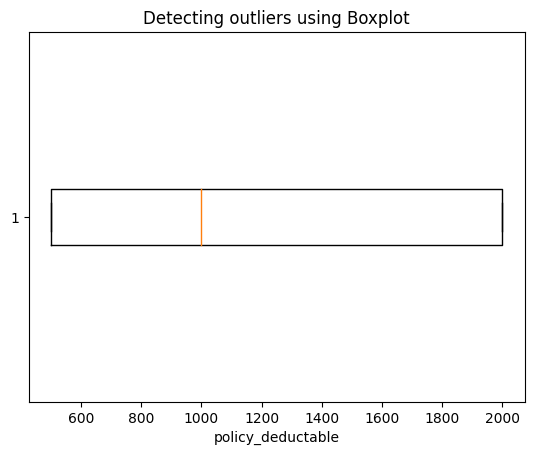

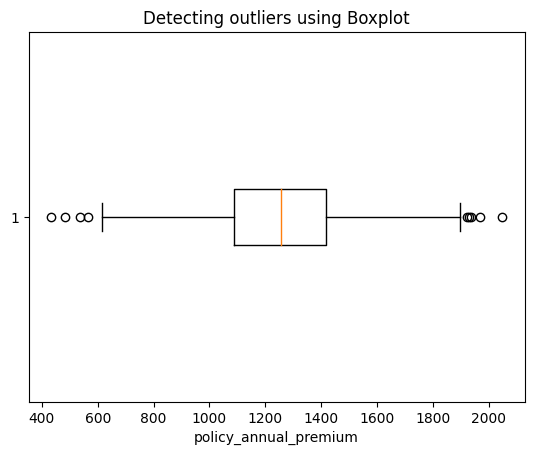

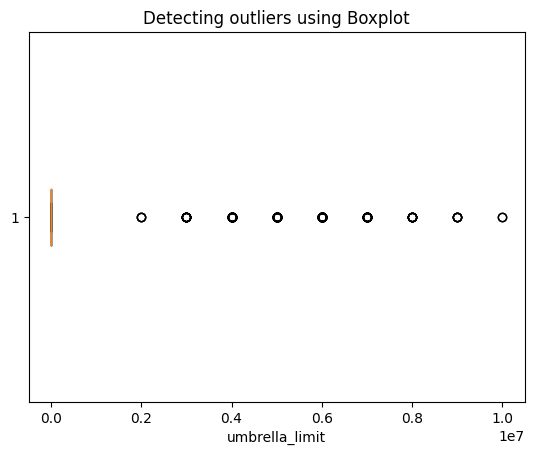

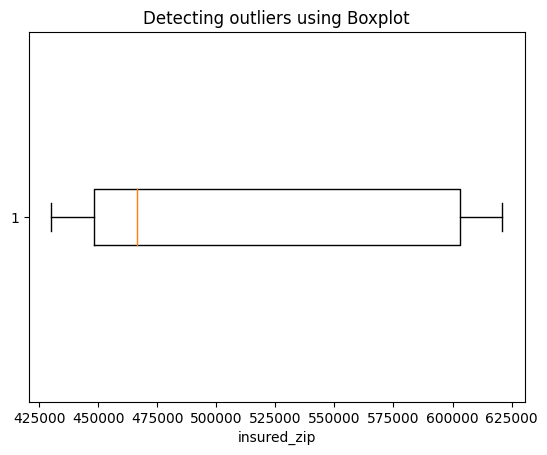

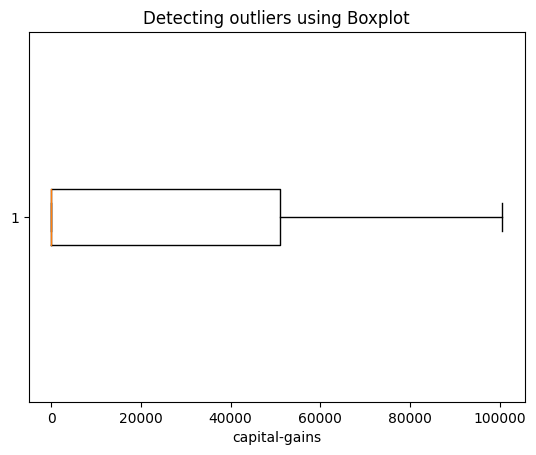

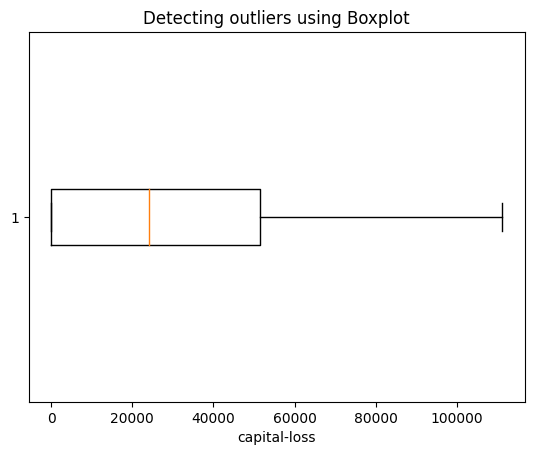

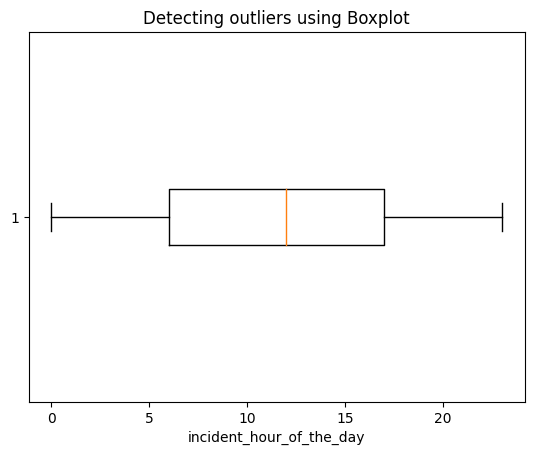

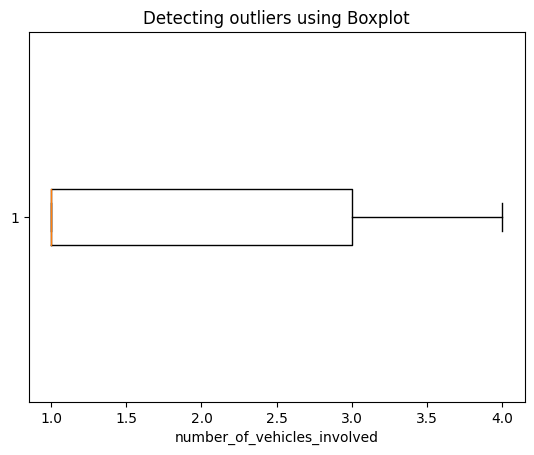

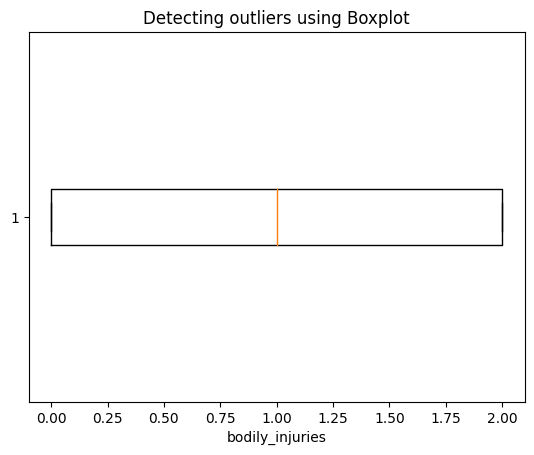

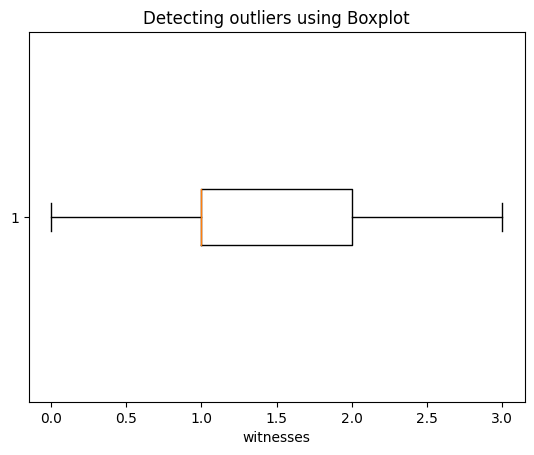

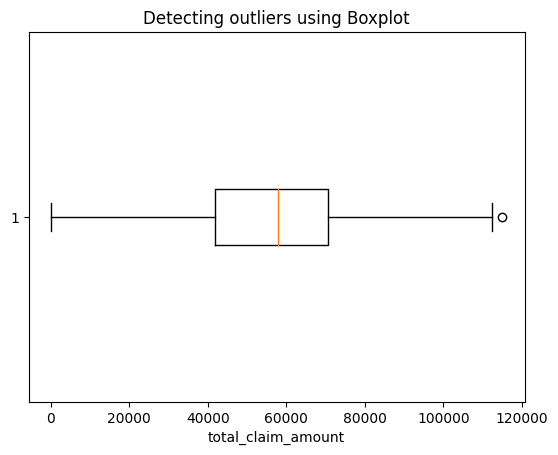

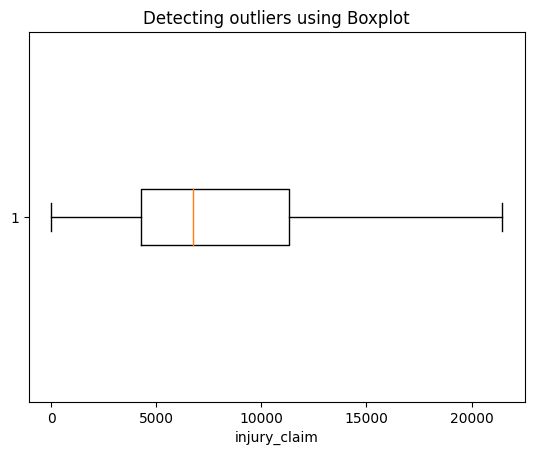

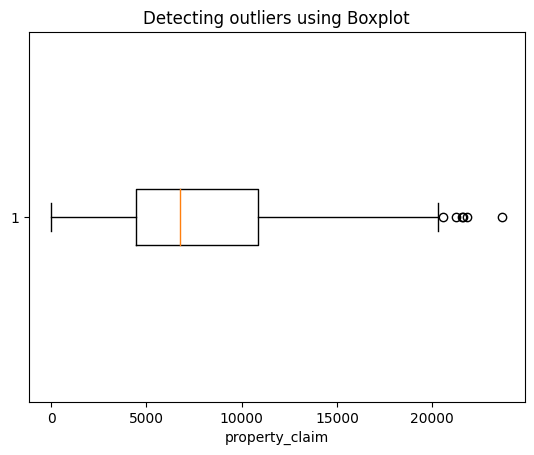

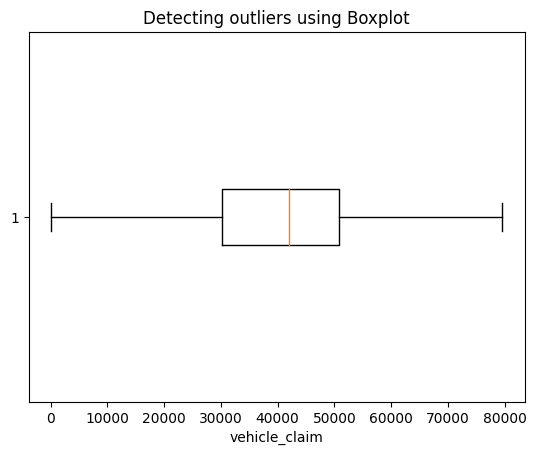

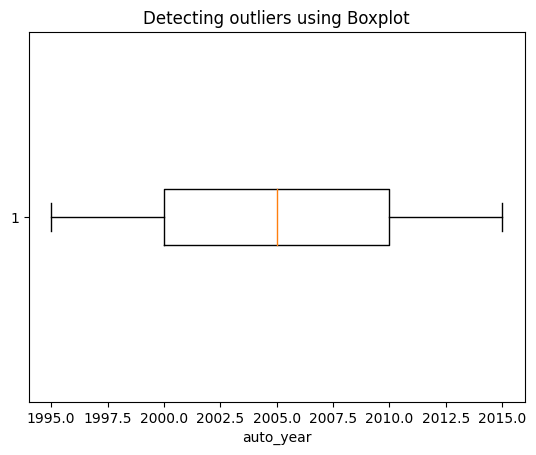

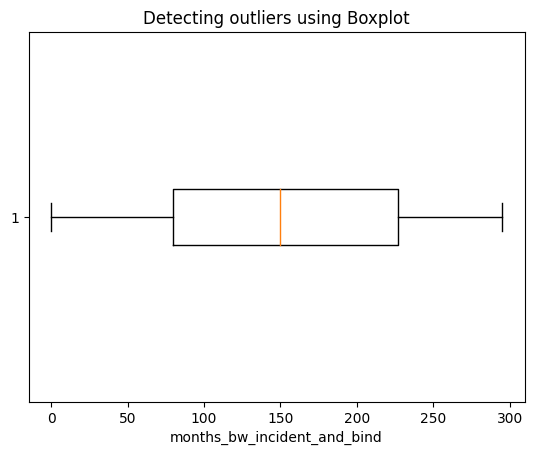

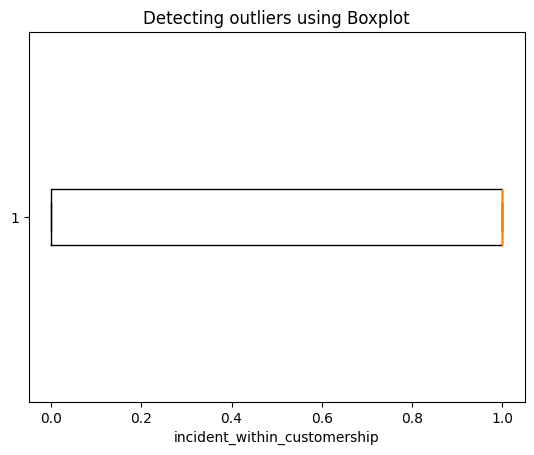

In [9]:
import matplotlib.pyplot as plt
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

In [10]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
 thres = 3
 mean = np.mean(data)
 std = np.std(data)
 for i in data:
  z_score = (i-mean)/std
  if (np.abs(z_score) > thres):
   outliers.append(i)
 return outliers

In [11]:
for i in dict(df.dtypes):
 outliers = []
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  sample_outliers = detect_outliers_zscore(df[i])
  print("Column: ", i)
  print("Outliers from Z-scores method: ", sample_outliers)
  if len(sample_outliers) > 0:
   median = np.median(df[i])
   for j in sample_outliers:
    df[i] = np.where(df[i]==j, median, df[i])
   print("After treatment: ")
   outliers = []
   sample_outliers = detect_outliers_zscore(df[i])
   print("Outliers from Z-scores method: ", sample_outliers)

Column:  months_as_customer
Outliers from Z-scores method:  []
Column:  age
Outliers from Z-scores method:  []
Column:  policy_deductable
Outliers from Z-scores method:  []
Column:  policy_annual_premium
Outliers from Z-scores method:  [2047.59, 433.33, 484.67]
After treatment: 
Outliers from Z-scores method:  []
Column:  umbrella_limit
Outliers from Z-scores method:  [8000000, 8000000, 9000000, 10000000, 8000000, 8000000, 8000000, 10000000, 9000000, 8000000, 9000000, 9000000, 8000000, 8000000, 9000000]
After treatment: 
Outliers from Z-scores method:  []
Column:  insured_zip
Outliers from Z-scores method:  []
Column:  capital-gains
Outliers from Z-scores method:  []
Column:  capital-loss
Outliers from Z-scores method:  [111100]
After treatment: 
Outliers from Z-scores method:  []
Column:  incident_hour_of_the_day
Outliers from Z-scores method:  []
Column:  number_of_vehicles_involved
Outliers from Z-scores method:  []
Column:  bodily_injuries
Outliers from Z-scores method:  []
Column:

In [12]:
df = df.replace("?", np.NaN)
for i in df.columns:
 print ("Column: ", i)
 print ("Number of nulls: ", df[i].isnull().sum())


Column:  months_as_customer
Number of nulls:  0
Column:  age
Number of nulls:  0
Column:  policy_bind_date
Number of nulls:  0
Column:  policy_state
Number of nulls:  0
Column:  policy_csl
Number of nulls:  0
Column:  policy_deductable
Number of nulls:  0
Column:  policy_annual_premium
Number of nulls:  0
Column:  umbrella_limit
Number of nulls:  0
Column:  insured_zip
Number of nulls:  0
Column:  insured_sex
Number of nulls:  0
Column:  insured_education_level
Number of nulls:  0
Column:  insured_occupation
Number of nulls:  0
Column:  insured_hobbies
Number of nulls:  0
Column:  insured_relationship
Number of nulls:  0
Column:  capital-gains
Number of nulls:  0
Column:  capital-loss
Number of nulls:  0
Column:  incident_date
Number of nulls:  0
Column:  incident_type
Number of nulls:  0
Column:  collision_type
Number of nulls:  178
Column:  incident_severity
Number of nulls:  0
Column:  authorities_contacted
Number of nulls:  91
Column:  incident_state
Number of nulls:  0
Column:  in

In [13]:
#To distinguish between continuous and categorical columns. High number of unique values in a column indicative of the column being continuous, low number of unique value indicates it is a categorical column.
df.nunique()

months_as_customer              391
age                              46
policy_bind_date                950
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           987
umbrella_limit                    7
insured_zip                     994
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    353
incident_date                    60
incident_type                     4
collision_type                    3
incident_severity                 4
authorities_contacted             4
incident_state                    7
incident_city                     7
incident_location               999
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage                   2
bodily_injuries             

In [14]:
#All values in this column are different
df = df.drop('incident_location', axis = 1)
#Missing values here are treated with Mode imputation as values were missing in categorical columns
df['collision_type'] = df['collision_type'].fillna(df['collision_type'].mode()[0])
df['property_damage'] = df['property_damage'].fillna(df['property_damage'].mode()[0])
df['police_report_available'] = df['police_report_available'].fillna(df['police_report_available'].mode()[0])

In [15]:
#Encoding
mappings = {}
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'O':
  mappings[i] = dict(zip(df[i].unique(), range(len(df[i].unique()))))
  df[i] = df[i].map(lambda x: mappings[i][x])
df

,months_as_customer,age,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,months_bw_incident_and_bind,incident_within_customership
0,328,48,2014-10-17,0,0,1000,1406.91,0.0,466132,0,...,71610,6510,13020.0,52080,0,0,2004,0,3,1
1,228,42,2006-06-27,1,0,2000,1197.22,5000000.0,468176,0,...,5070,780,780.0,3510,1,1,2007,0,100,1
2,134,29,2000-09-06,0,1,2000,1413.14,5000000.0,430632,1,...,34650,7700,3850.0,23100,2,2,2007,1,170,0
3,256,41,1990-05-25,2,0,2000,1415.74,6000000.0,608117,1,...,63400,6340,6340.0,50720,3,3,2014,0,290,0
4,228,44,2014-06-06,2,2,1000,1583.91,6000000.0,610706,0,...,6500,1300,650.0,4550,4,4,2009,1,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,1991-07-16,0,2,1000,1310.80,0.0,431289,1,...,87200,17440,8720.0,61040,12,31,2006,1,278,0
996,285,41,2014-01-05,2,1,1000,1436.79,0.0,608177,1,...,108480,18080,18080.0,72320,13,27,2015,1,12,1
997,130,34,2003-02-17,0,0,500,1383.49,3000000.0,442797,1,...,67500,7500,7500.0,52500,9,17,1996,1,140,0
998,458,62,2011-11-18,2,2,2000,1356.92,5000000.0,441714,0,...,46980,5220,5220.0,36540,6,7,1998,1,38,1


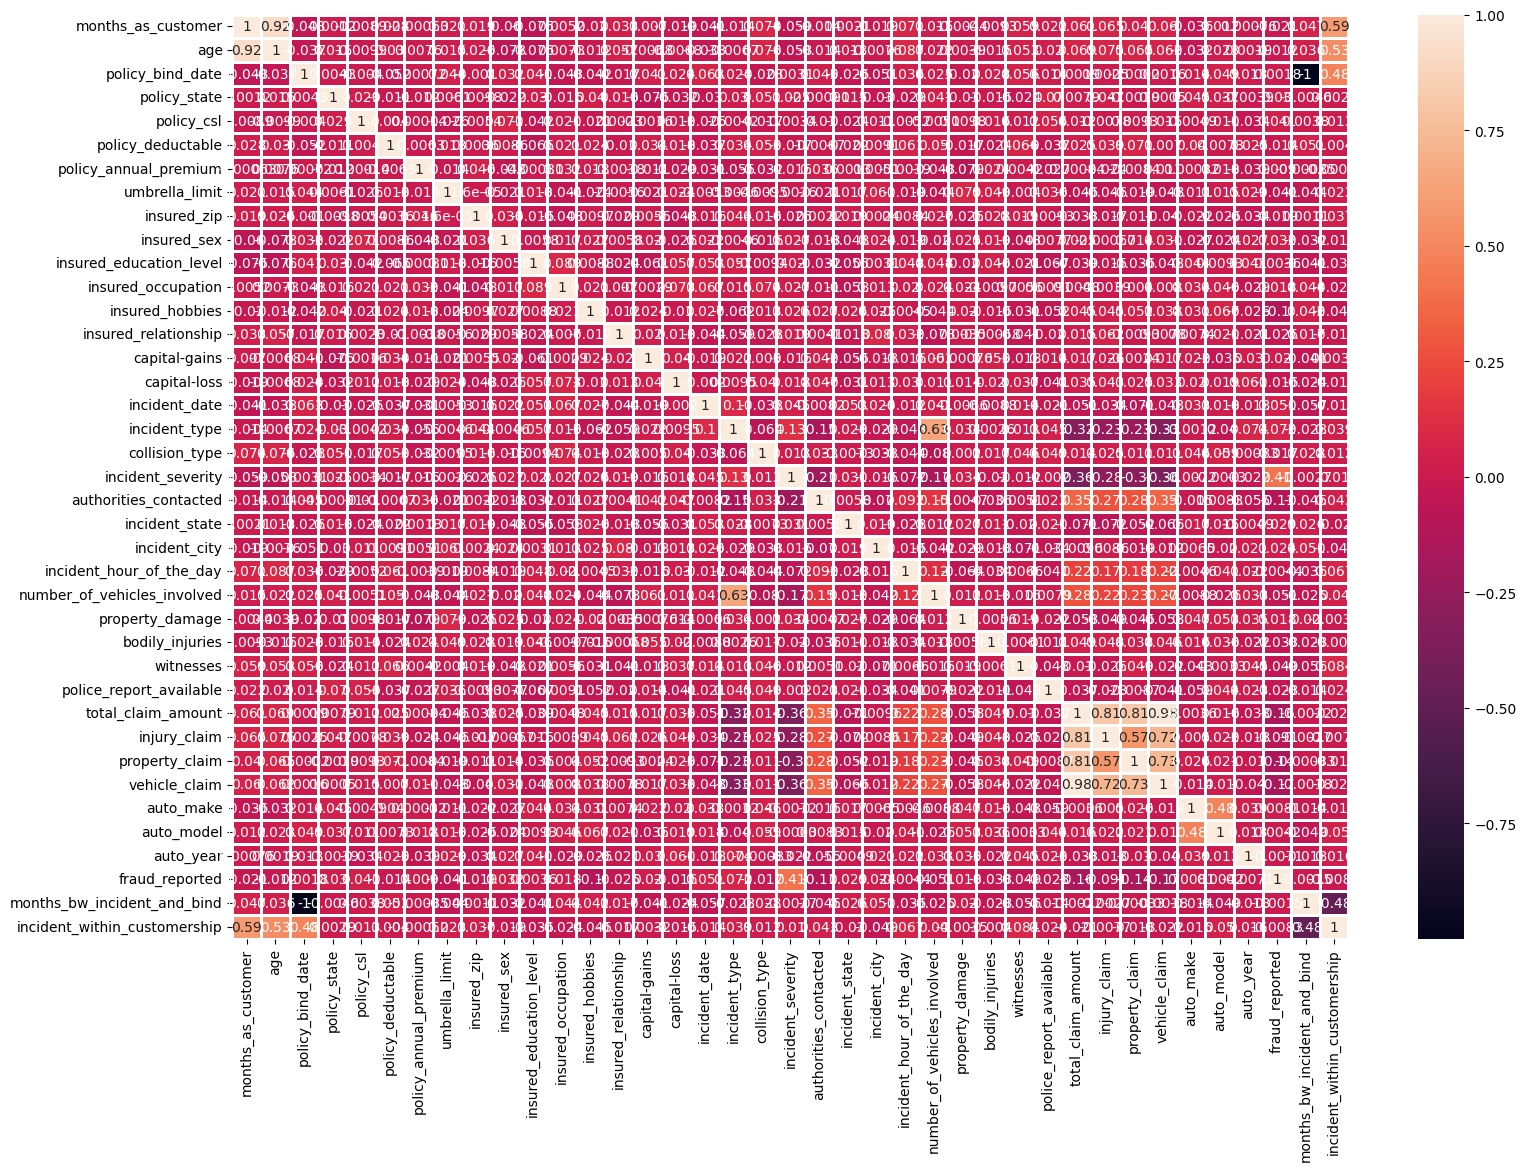

In [16]:
#Feature selection
import seaborn as sns
plt.figure(figsize = (18, 12))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [17]:
df = df.drop('vehicle_claim', axis = 1) #as its correlation with another feature (total_claim_amount) > 95%. Keeping multiple strongly correlated featured would make the collection of such features influential.
df = df.drop(['policy_bind_date', 'incident_date'], axis = 1) #as information from these features has been exported to new derived features
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
x=df.drop('fraud_reported', axis = 1)
y=df['fraud_reported']
model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_)


[0.02862298 0.02505624 0.02253259 0.02291444 0.02372467 0.02867988
 0.01706124 0.02862886 0.01816933 0.0277862  0.02859496 0.04044767
 0.02560552 0.02498995 0.02474609 0.0178491  0.02052673 0.15526035
 0.0269579  0.02729948 0.02643467 0.02526464 0.01608102 0.01806229
 0.02190015 0.02413208 0.01783807 0.03437428 0.02679627 0.03228086
 0.02702185 0.02533795 0.0270004  0.02544945 0.01657184]


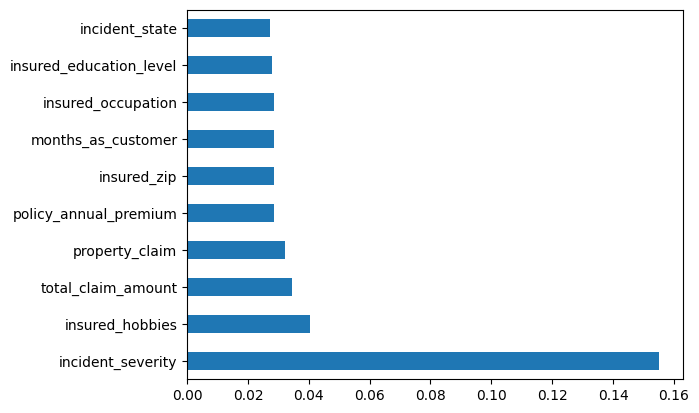

In [18]:
#Finding 10 most important features
feature_importances = pd.Series(model.feature_importances_, index = x.columns)
feature_importances.nlargest(10).plot(kind = 'barh')
plt.show()

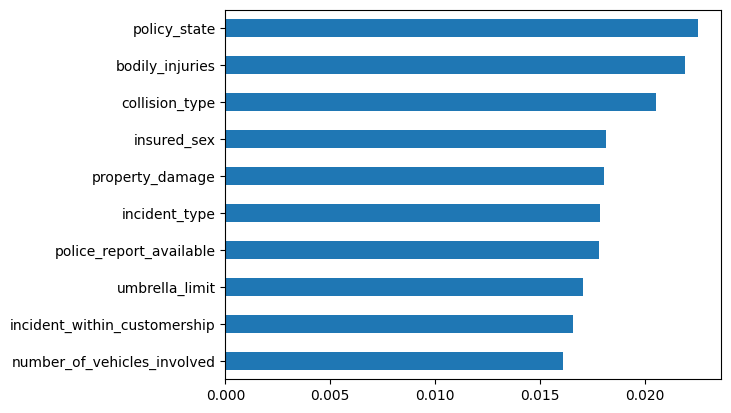

In [19]:
#Finding 10 least important features
feature_importances.nsmallest(10).plot(kind = 'barh')
plt.show()

In [20]:
#Not selecting columns with importance < 0.02
df = df.drop(['collision_type','property_damage', 'incident_within_customership', 'insured_sex', 'umbrella_limit', 'number_of_vehicles_involved', 'police_report_available', 'incident_type'], axis = 1)

In [21]:
print(mappings['fraud_reported'])
print("YES: ", y[y == 0].shape[0])
print("NO: ", y[y == 1].shape[0])

{'Y': 0, 'N': 1}
YES:  247
NO:  752


fraud_reported :  {'Y': 0, 'N': 1}
incident_severity :  {'Major Damage': 0, 'Minor Damage': 1, 'Total Loss': 2, 'Trivial Damage': 3}
fraud_reported       0    1
incident_severity          
0                  167  108
1                   38  316
2                   36  244
3                    6   84

fraud_reported :  {'Y': 0, 'N': 1}
insured_hobbies :  {'sleeping': 0, 'reading': 1, 'board-games': 2, 'bungie-jumping': 3, 'base-jumping': 4, 'golf': 5, 'camping': 6, 'dancing': 7, 'skydiving': 8, 'movies': 9, 'hiking': 10, 'yachting': 11, 'paintball': 12, 'chess': 13, 'kayaking': 14, 'polo': 15, 'basketball': 16, 'video-games': 17, 'cross-fit': 18, 'exercise': 19}
fraud_reported    0   1
insured_hobbies        
0                 8  33
1                17  47
2                14  34
3                 9  47
4                13  36
5                 6  49
6                 5  50
7                 5  38
8                11  38
9                 9  46
10               12  40
11               1

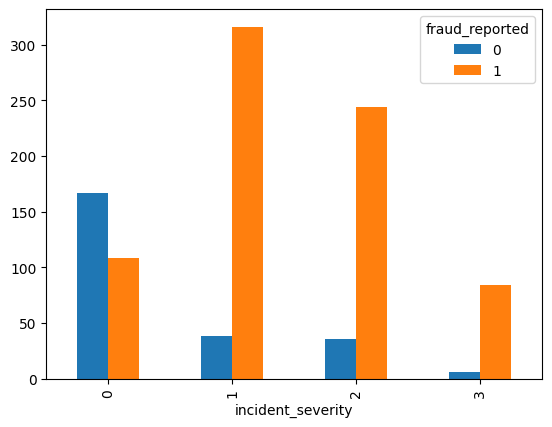

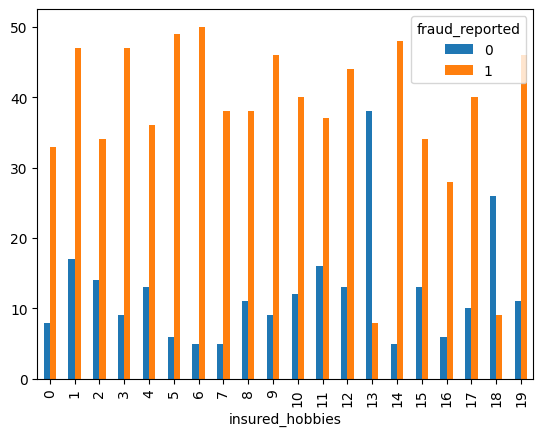

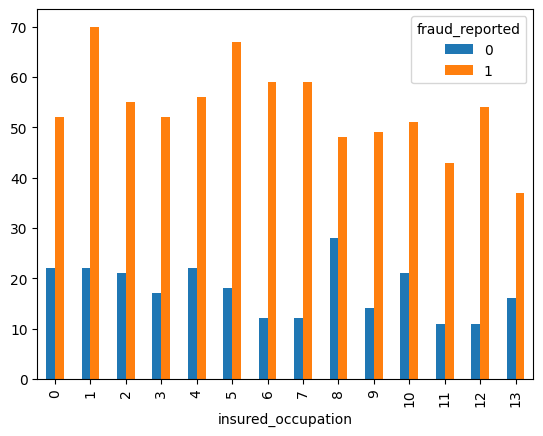

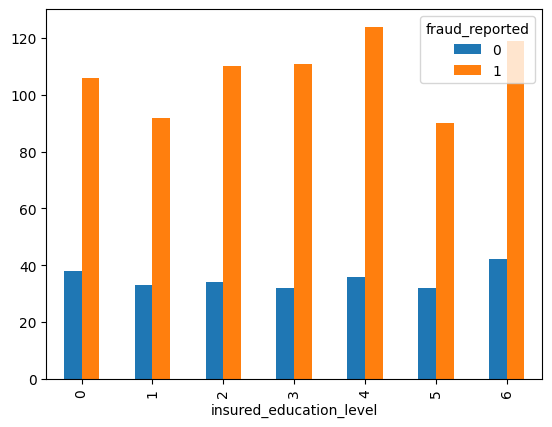

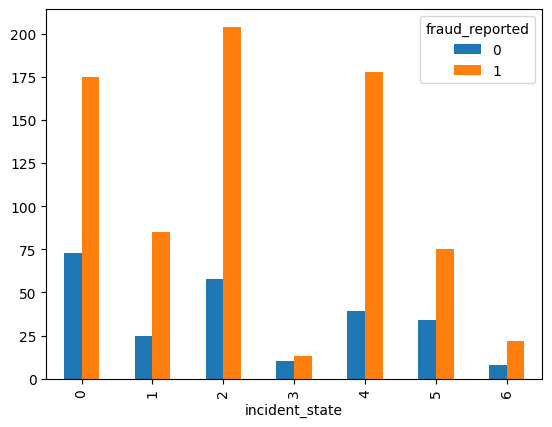

In [22]:
for i in dict(feature_importances.nlargest(10)):
 if i in mappings:
  chart = pd.crosstab(index=df[i],columns=df['fraud_reported'])
  print('fraud_reported' + ' : ', mappings['fraud_reported'])
  print(i + ' : ', mappings[i])
  print(chart)
  print()
  chart.plot.bar()

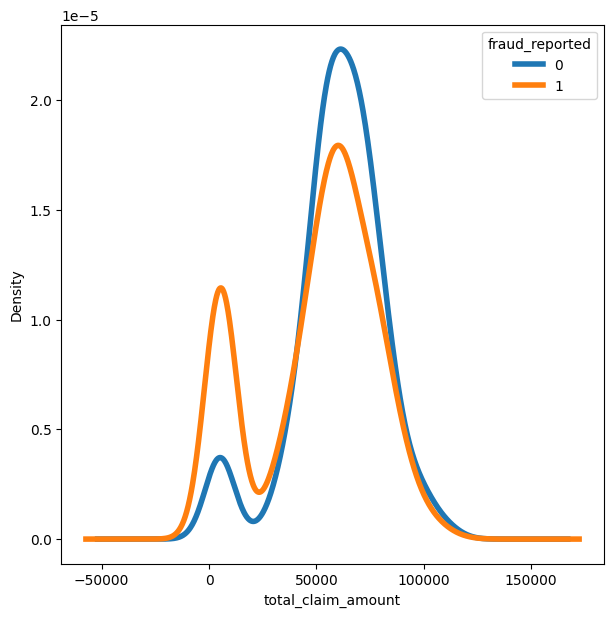

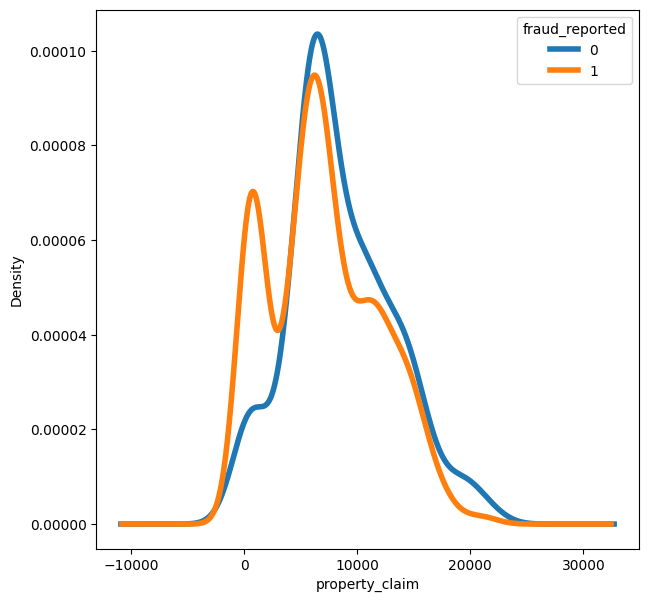

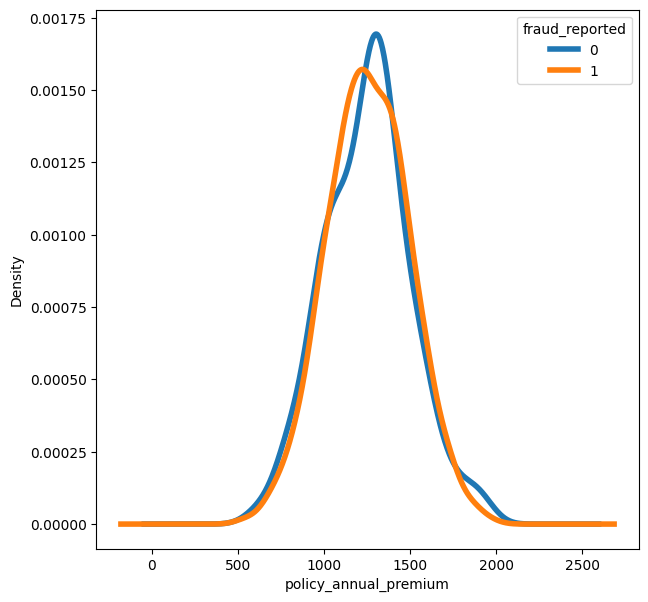

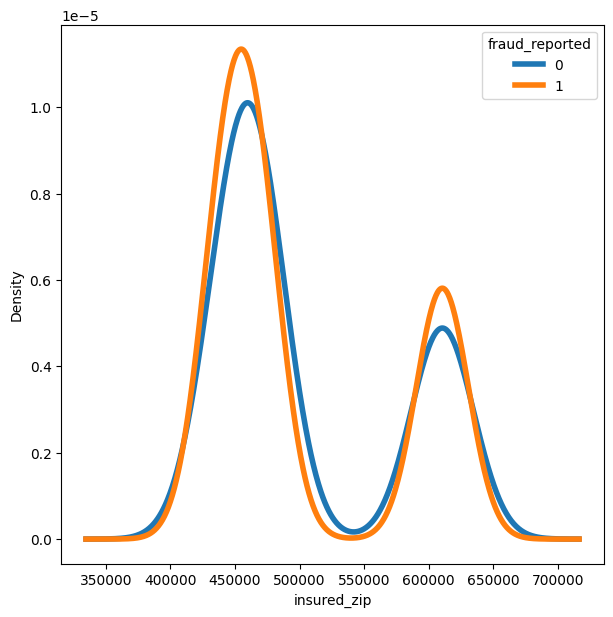

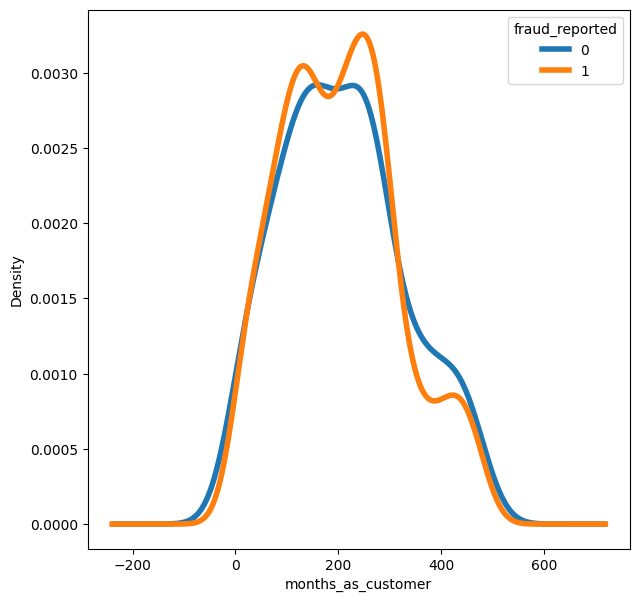

In [23]:
for i in dict(feature_importances.nlargest(10)):
 if i not in mappings:
  df_specific_column = df.pivot(columns = 'fraud_reported', values = i)
  df_specific_column.plot.density(figsize = (7, 7), linewidth = 4)
  plt.xlabel(i)

In [24]:
from sklearn.model_selection import train_test_split
y = df['fraud_reported']
x = df.drop('fraud_reported', axis = 1)
Train, Test, Y_Train, Y_Test = train_test_split(x, y, test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
model = LogisticRegression()
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))


Accuracy: 0.765

 clasification report:
               precision    recall  f1-score   support

           0       1.00      0.02      0.04        48
           1       0.76      1.00      0.87       152

    accuracy                           0.77       200
   macro avg       0.88      0.51      0.45       200
weighted avg       0.82      0.77      0.67       200


 confussion matrix:
 [[  1  47]
 [  0 152]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [26]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.74

 clasification report:
               precision    recall  f1-score   support

           0       0.38      0.12      0.19        48
           1       0.77      0.93      0.85       152

    accuracy                           0.74       200
   macro avg       0.57      0.53      0.52       200
weighted avg       0.68      0.74      0.69       200


 confussion matrix:
 [[  6  42]
 [ 10 142]]


In [27]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))


Accuracy: 0.735

 clasification report:
               precision    recall  f1-score   support

           0       0.35      0.12      0.18        48
           1       0.77      0.93      0.84       152

    accuracy                           0.73       200
   macro avg       0.56      0.53      0.51       200
weighted avg       0.67      0.73      0.68       200


 confussion matrix:
 [[  6  42]
 [ 11 141]]


In [28]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))


Accuracy: 0.765

 clasification report:
               precision    recall  f1-score   support

           0       0.51      0.62      0.56        48
           1       0.87      0.81      0.84       152

    accuracy                           0.77       200
   macro avg       0.69      0.72      0.70       200
weighted avg       0.79      0.77      0.77       200


 confussion matrix:
 [[ 30  18]
 [ 29 123]]


In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.775

 clasification report:
               precision    recall  f1-score   support

           0       0.54      0.42      0.47        48
           1       0.83      0.89      0.86       152

    accuracy                           0.78       200
   macro avg       0.68      0.65      0.66       200
weighted avg       0.76      0.78      0.76       200


 confussion matrix:
 [[ 20  28]
 [ 17 135]]


In [30]:
from xgboost import XGBClassifier
model = XGBClassifier()
model = model.fit(Train, Y_Train)
pred = model.predict(Test)
print ('Accuracy:', accuracy_score(Y_Test, pred))
print ('\n clasification report:\n', classification_report(Y_Test, pred))
print ('\n confussion matrix:\n',confusion_matrix(Y_Test, pred))

Accuracy: 0.805

 clasification report:
               precision    recall  f1-score   support

           0       0.58      0.67      0.62        48
           1       0.89      0.85      0.87       152

    accuracy                           0.81       200
   macro avg       0.74      0.76      0.75       200
weighted avg       0.82      0.81      0.81       200


 confussion matrix:
 [[ 32  16]
 [ 23 129]]


In [31]:
!pip install shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 17.4 MB/s eta 0:00:00


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5, 25.5, 26.5]),
 [Text(0, 0.5, 'months_as_customer'),
  Text(0, 1.5, 'age'),
  Text(0, 2.5, 'policy_state'),
  Text(0, 3.5, 'policy_csl'),
  Text(0, 4.5, 'policy_deductable'),
  Text(0, 5.5, 'policy_annual_premium'),
  Text(0, 6.5, 'insured_zip'),
  Text(0, 7.5, 'insured_education_level'),
  Text(0, 8.5, 'insured_occupation'),
  Text(0, 9.5, 'insured_hobbies'),
  Text(0, 10.5, 'insured_relationship'),
  Text(0, 11.5, 'capital-gains'),
  Text(0, 12.5, 'capital-loss'),
  Text(0, 13.5, 'incident_severity'),
  Text(0, 14.5, 'authorities_contacted'),
  Text(0, 15.5, 'incident_state'),
  Text(0, 16.5, 'incident_city'),
  Text(0, 17.5, 'incident_hour_of_the_day'),
  Text(0, 18.5, 'bodily_injuries'),
  Text(0, 19.5, 'witnesses'),
  Text(0, 20.5, 'total_claim_amount'),
  Text(0, 21.5, 'injury_claim'),
  Text(0, 22.5, 'propert

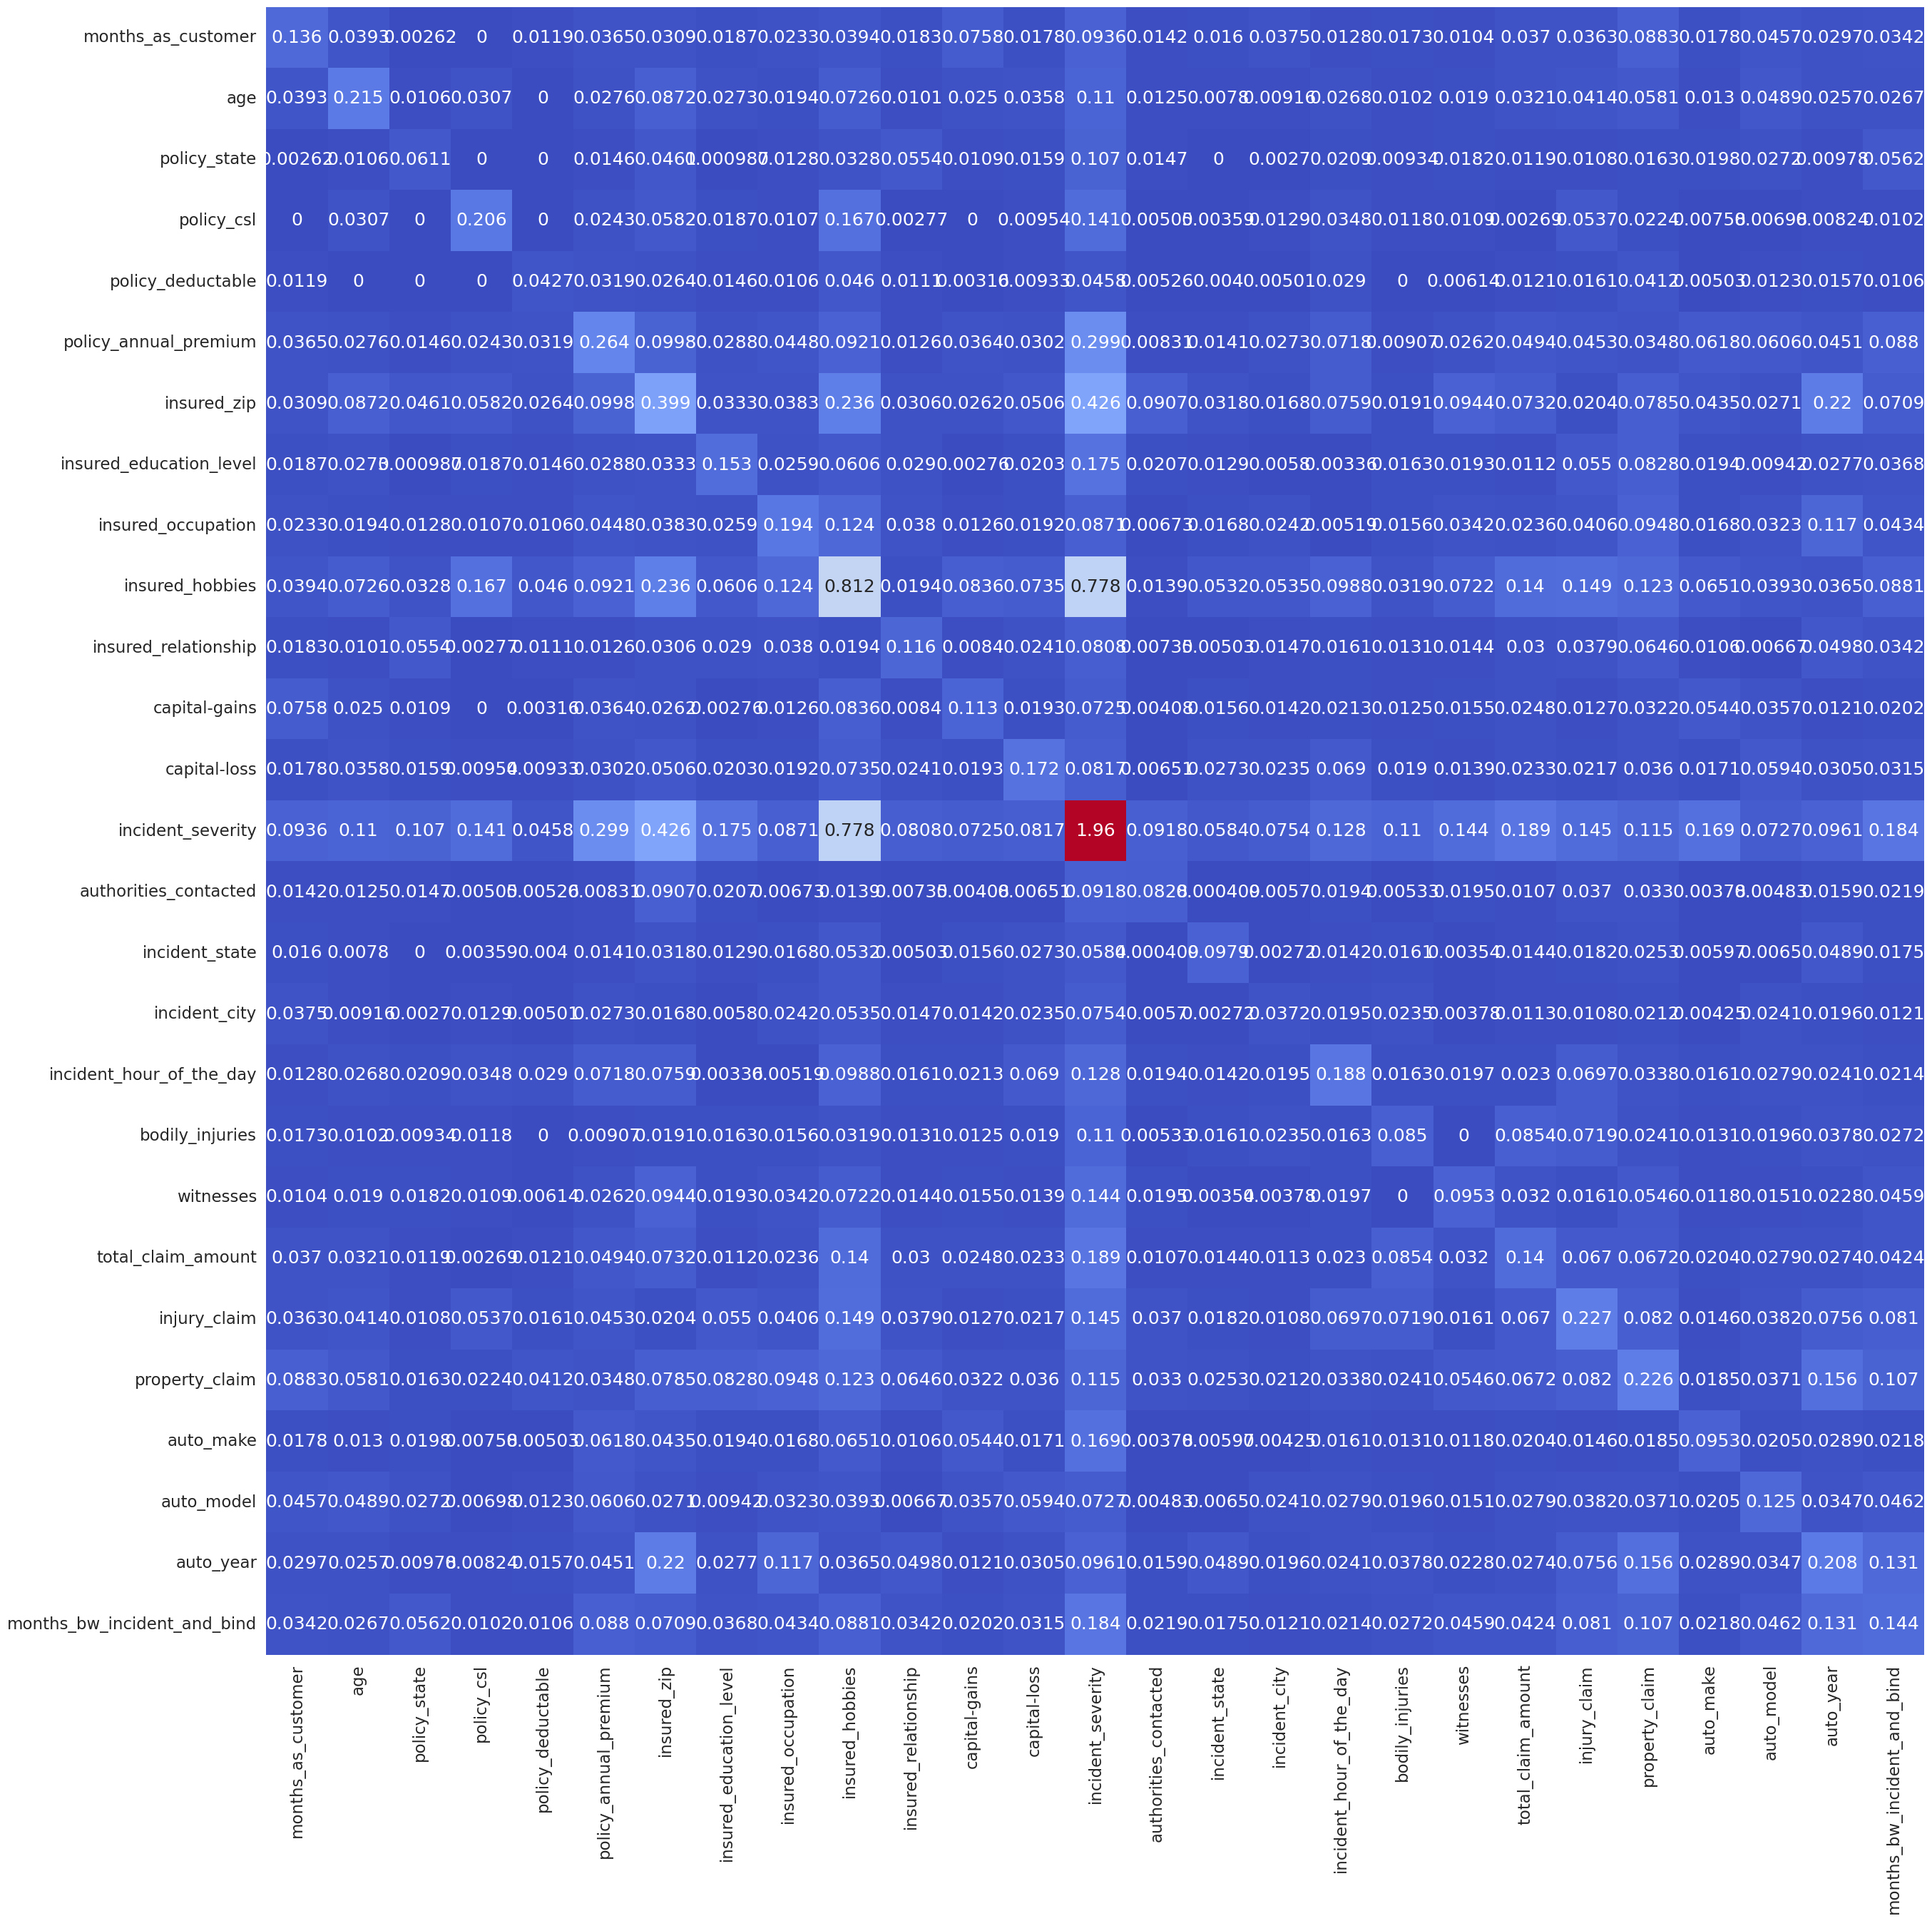

In [32]:
import seaborn as sns
import xgboost as xgb
import shap
shap.initjs()
#Explanatory model
model = xgb.XGBClassifier()

model = model.fit(x, y)
explainer = shap.TreeExplainer(model)
shap_interaction = explainer.shap_interaction_values(x)
#Main and interaction effect scores
mean_shap = np.abs(shap_interaction).mean(0)
matrix = pd.DataFrame(mean_shap,index=x.columns,columns=x.columns)
matrix.where(matrix.values == np.diagonal(matrix),matrix.values*2,inplace=True)
plt.figure(figsize=(30, 30), facecolor='w', edgecolor='k')
sns.set(font_scale=1.5)
sns.heatmap(matrix,cmap='coolwarm',annot=True,fmt='.3g',cbar=False)
plt.yticks(rotation=0)

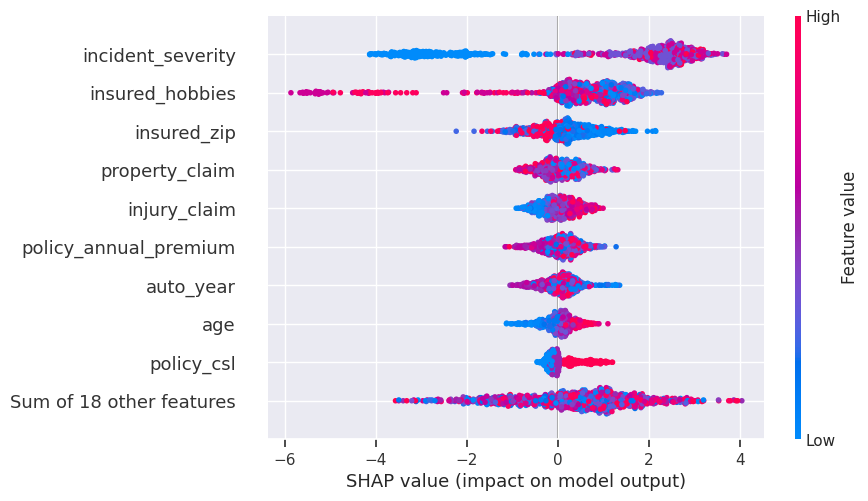

In [33]:
#Plot showing main effect
shap_values = explainer(x)
shap.plots.beeswarm(shap_values)

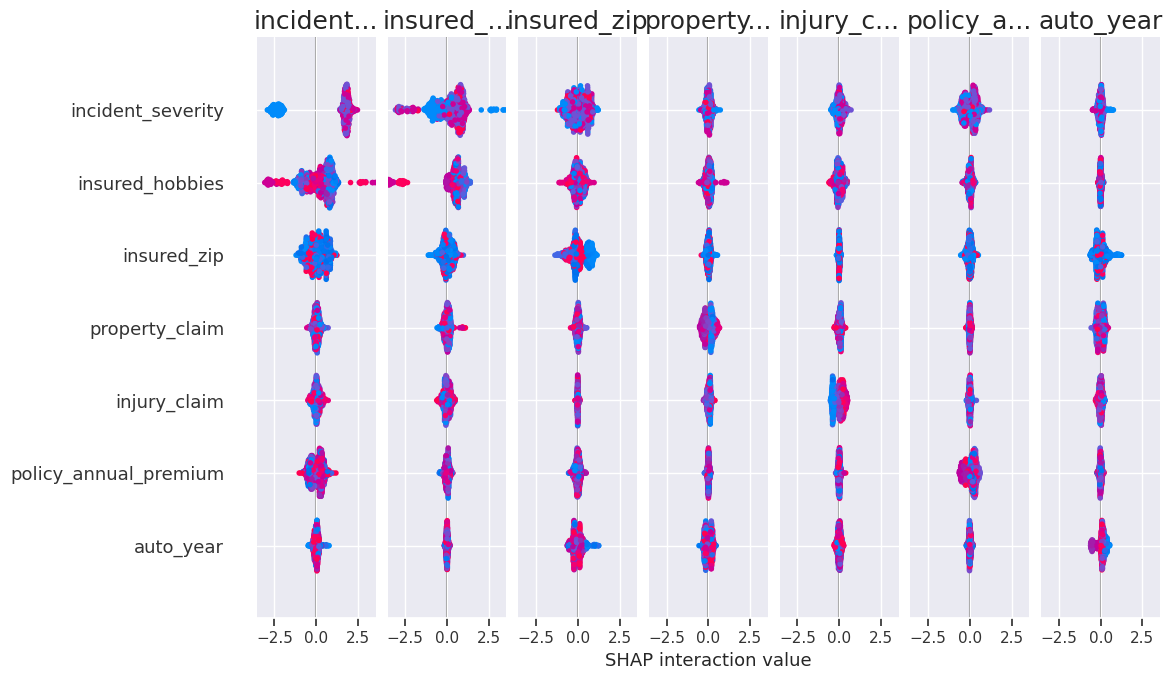

In [34]:
#Plots showing main and interaction effects
shap.summary_plot(shap_interaction, x)

In [35]:
#Expected Odds Ratios
from scipy import stats
for c in dict(feature_importances.nlargest(10)):
 if c in mappings:
  print()
  print (c, " : ",mappings[c], '\n')
  for i in mappings[c].values():
   table = np.array([[df[df[c] == i]['fraud_reported'].value_counts()[0], df[df[c] == i]['fraud_reported'].value_counts()[1]], [df[df[c] != i]['fraud_reported'].value_counts()[0], df[df[c] != i]['fraud_reported'].value_counts()[1]]])
   print (c, " = ", i)
   print (table)
   oddsratio = stats.fisher_exact(table)
   print("Odds Ratio: ", oddsratio[0])


incident_severity  :  {'Major Damage': 0, 'Minor Damage': 1, 'Total Loss': 2, 'Trivial Damage': 3} 

incident_severity  =  0
[[167 108]
 [ 80 644]]
Odds Ratio:  12.447685185185184
incident_severity  =  1
[[ 38 316]
 [209 436]]
Odds Ratio:  0.2508630609896433
incident_severity  =  2
[[ 36 244]
 [211 508]]
Odds Ratio:  0.35521715484422345
incident_severity  =  3
[[  6  84]
 [241 668]]
Odds Ratio:  0.1979845880260818

insured_hobbies  :  {'sleeping': 0, 'reading': 1, 'board-games': 2, 'bungie-jumping': 3, 'base-jumping': 4, 'golf': 5, 'camping': 6, 'dancing': 7, 'skydiving': 8, 'movies': 9, 'hiking': 10, 'yachting': 11, 'paintball': 12, 'chess': 13, 'kayaking': 14, 'polo': 15, 'basketball': 16, 'video-games': 17, 'cross-fit': 18, 'exercise': 19} 

insured_hobbies  =  0
[[  8  33]
 [239 719]]
Odds Ratio:  0.7293013820210473
insured_hobbies  =  1
[[ 17  47]
 [230 705]]
Odds Ratio:  1.108695652173913
insured_hobbies  =  2
[[ 14  34]
 [233 718]]
Odds Ratio:  1.2688714970966928
insured_hobbie

In [36]:
pred = model.predict(x)
df['pred'] = pred
#Observed Odds Ratios
for c in dict(feature_importances.nlargest(10)):
 if c in mappings:
  print()
  print (c, " : ",mappings[c], '\n')
  for i in mappings[c].values():
   table = np.array([[df[df[c] == i]['pred'].value_counts()[0], df[df[c] == i]['pred'].value_counts()[1]], [df[df[c] != i]['pred'].value_counts()[0], df[df[c] != i]['pred'].value_counts()[1]]])
   print (c, " = ", i)
   print (table)
   oddsratio = stats.fisher_exact(table)
   print("Odds Ratio: ", oddsratio[0])



incident_severity  :  {'Major Damage': 0, 'Minor Damage': 1, 'Total Loss': 2, 'Trivial Damage': 3} 

incident_severity  =  0
[[167 108]
 [ 80 644]]
Odds Ratio:  12.447685185185184
incident_severity  =  1
[[ 38 316]
 [209 436]]
Odds Ratio:  0.2508630609896433
incident_severity  =  2
[[ 36 244]
 [211 508]]
Odds Ratio:  0.35521715484422345
incident_severity  =  3
[[  6  84]
 [241 668]]
Odds Ratio:  0.1979845880260818

insured_hobbies  :  {'sleeping': 0, 'reading': 1, 'board-games': 2, 'bungie-jumping': 3, 'base-jumping': 4, 'golf': 5, 'camping': 6, 'dancing': 7, 'skydiving': 8, 'movies': 9, 'hiking': 10, 'yachting': 11, 'paintball': 12, 'chess': 13, 'kayaking': 14, 'polo': 15, 'basketball': 16, 'video-games': 17, 'cross-fit': 18, 'exercise': 19} 

insured_hobbies  =  0
[[  8  33]
 [239 719]]
Odds Ratio:  0.7293013820210473
insured_hobbies  =  1
[[ 17  47]
 [230 705]]
Odds Ratio:  1.108695652173913
insured_hobbies  =  2
[[ 14  34]
 [233 718]]
Odds Ratio:  1.2688714970966928
insured_hobbie